### collinearity

*  Topic: Introduction to Collinearity
*  Data:  DataScience subreddit titles from the past 3 years
*  Original Objective:  Predict how many votes a post would receive based on its title
*  Features:  See below

  1. WordCount - The number of words in the title
  2. CharCount - the number of characters in the title
  3. Vowels - The number of vowels in the title
  4. Consonants - The number of consonants in the title
  5. gtavg - The number of up-votes greater than the average number of up-votes per post
  6. polarity - The positive or negative sentiment of the title
  7. subjectivity - Measure of objectivity and subjectivity of each title
  8. Noun Phrases - The number of nouns in each title
  9. Syllable - The number of syllables in each title
  10. Kincaid - A score that meaures the grade-level of each title
  11. Flesch - Measures the readability of each title

![](../../images/correlation.png)



In [5]:
from textblob import TextBlob
from yellowbrick.features.rankd import Rank2D
from textstat.textstat import textstat
import pandas as pd
import numpy as np

data = pd.read_csv('data/processed_datascience.csv.bz2')

# Stats for Upvotes
print('Exploratory Stats for Upvotes')
print(data.ups.describe())

## Optional: Throw out outliers by including rows with Z-Scores less than 2.5 and greater than -2.5
data['z_scores'] = np.abs((data.ups-data.ups.mean())/data.ups.std())
data = data[data['z_scores']<= 2.5]

## Optional: Log transformation of up-votes
data['log_ups'] = np.log1p(data['ups'])

blobs = [TextBlob(sentence) for sentence in data.title]
data['polarity'] = [blob.sentiment.polarity for blob in blobs]
data['subjectivity'] = [blob.sentiment.subjectivity for blob in blobs]
data['noun_phrases'] = [len(blob.noun_phrases) for blob in blobs]

data['gtavg'] = data['ups'] > data.ups.mean()
data['wordcount'] = data['title'].str.split().apply(len)
data['charcount'] = data.title.str.len()
data['vowels'] = data.title.str.findall(r'(?i)([aeiou])').apply(len)
data['consonants'] = data.title.str.findall(r'(?i)([^aeiou])').apply(len)
data['syllable'] = [textstat.syllable_count(x) for x in data.title]
data['kincaid'] = [textstat.flesch_kincaid_grade(x) for x in data.title]
data['flesch'] = [textstat.flesch_reading_ease(x) for x in data.title]

df = data[['gtavg','wordcount','charcount','vowels','consonants', 'syllable', 'polarity',
           'subjectivity', 'noun_phrases', 'kincaid', 'flesch']]

features = ['wordcount','charcount','vowels','consonants', 'syllable', 
            'polarity', 'subjectivity', 'noun_phrases', 'kincaid', 'flesch' ]
df.to_csv('data/reddit_data.csv')

Exploratory Stats for Upvotes
count    8856.000000
mean        9.870709
std        21.516689
min         0.000000
25%         1.000000
50%         4.000000
75%         9.000000
max       552.000000
Name: ups, dtype: float64


Exploratory Stats for Upvotes
count    8856.000000
mean        9.870709
std        21.516689
min         0.000000
25%         1.000000
50%         4.000000
75%         9.000000
max       552.000000
Name: ups, dtype: float64


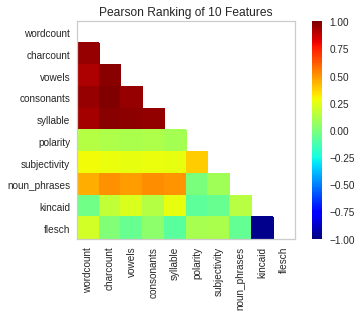

In [4]:
X = data[features].as_matrix()
y = data['gtavg'].as_matrix()

visualizer = Rank2D(features=features, algorithm='pearson', colormap='jet')
visualizer.fit(X,y)
visualizer.transform(X)
#visualizer.poof()
visualizer.poof(outpath="pearson.png")